# Python Data Science Prep & EDA Project

## 1. Scope the Project

Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**.

## 2. Gather Data

In [1]:
import pandas as pd
import numpy as np

customer_data = pd.read_csv('../data/maven_music_customers.csv')
listening_history = pd.read_excel('../data/maven_music_listening_history.xlsx')
audio_data = pd.read_excel('../data/maven_music_listening_history.xlsx', sheet_name=1)
session_data = pd.read_excel('../data/maven_music_listening_history.xlsx', sheet_name=2)

In [2]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [3]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [4]:
audio_data.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [5]:
session_data.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


## 3. Clean Data

### a. Convert Data Types

Check the data types of the data in the tables and convert to numeric and datetime values as necessary.

In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer ID        30 non-null     int64 
 1   Customer Name      30 non-null     object
 2   Email              30 non-null     object
 3   Member Since       30 non-null     object
 4   Subscription Plan  25 non-null     object
 5   Subscription Rate  30 non-null     object
 6   Discount?          7 non-null      object
 7   Cancellation Date  13 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


In [7]:
listening_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


In [8]:
audio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 672.0+ bytes


In [9]:
session_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [10]:
customer_data['Member Since'] = pd.to_datetime(customer_data['Member Since'])
customer_data['Cancellation Date'] = pd.to_datetime(customer_data['Cancellation Date'])
customer_data['Subscription Rate'] = pd.to_numeric(customer_data['Subscription Rate'].str.replace("$", ""))

C:\Users\tamar\AppData\Local\Temp\ipykernel_18072\1322217258.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  customer_data['Subscription Rate'] = pd.to_numeric(customer_data['Subscription Rate'].str.replace("$", ""))


### b. Resolve Data Issues

Check for missing data, inconsistent text and typos, duplicate data and outliers.

#### i. Missing Data

In [11]:
# Look for NaN values in the data
customer_data['Subscription Plan'].fillna("Basic (Ads)", inplace=True)

In [12]:
customer_data['Discount?'] = np.where(customer_data['Discount?'] == 'Yes', 1, 0)

In [13]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  30 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          30 non-null     int32         
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int32(1), int64(1), object(3)
memory usage: 1.9+ KB


#### ii. Inconsistent Text & Typos & Outliers   

In [14]:
customer_data.describe()

,Customer ID,Subscription Rate,Discount?
count,30.000000,30.000000,30.000000
mean,6276.333333,8.556667,0.233333
std,814.255587,17.517840,0.430183
min,5001.000000,2.990000,0.000000
25%,5759.500000,2.990000,0.000000
50%,6196.000000,2.990000,0.000000
75%,6823.500000,7.990000,0.000000
max,7583.000000,99.990000,1.000000


In [15]:
customer_data[customer_data['Subscription Rate'] > 7.99]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
12,6029,Chord Campbell,Email: campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02
14,6163,Melody Parks,Email: park.of.melodies@email.com,2023-04-05,Premium (No Ads),9.99,0,NaT
15,6229,Symphony Rhodes,Email: rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,0,2023-06-02


In [16]:
customer_data.iloc[15, 5] = 9.99

In [17]:
customer_data.describe()

,Customer ID,Subscription Rate,Discount?
count,30.000000,30.000000,30.000000
mean,6276.333333,5.556667,0.233333
std,814.255587,3.058998,0.430183
min,5001.000000,2.990000,0.000000
25%,5759.500000,2.990000,0.000000
50%,6196.000000,2.990000,0.000000
75%,6823.500000,7.990000,0.000000
max,7583.000000,9.990000,1.000000


In [18]:
audio_data.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [19]:
session_data.describe()

,Session ID
count,90.000000
mean,105619.788889
std,3616.208569
min,100520.000000
25%,102149.000000
50%,105390.500000
75%,109658.250000
max,111333.000000


In [20]:
listening_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [21]:
audio_data.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [22]:
audio_data['Genre'].value_counts()

Pop Music     3
Hip Hop       3
Comedy        3
Pop           2
Country       2
Jazz          2
True Crime    2
Name: Genre, dtype: int64

In [23]:
audio_data['Genre'] = np.where(audio_data['Genre'] == 'Pop Music', 'Pop', audio_data['Genre'])

In [24]:
audio_data['Popularity'].sort_values().value_counts()

2     2
4     2
1     1
5     1
8     1
9     1
10    1
17    1
20    1
23    1
28    1
30    1
52    1
63    1
80    1
Name: Popularity, dtype: int64

In [25]:
audio_data[['Audio Type', 'Audio ID']] = audio_data['ID'].str.split("-", expand=True)
audio_data.drop(columns = 'ID', inplace=True)

In [26]:
audio_data['Audio ID'] = pd.to_numeric(audio_data['Audio ID'])

In [27]:
audio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        17 non-null     object
 1   Genre       17 non-null     object
 2   Popularity  17 non-null     int64 
 3   Audio Type  17 non-null     object
 4   Audio ID    17 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 808.0+ bytes


#### iii. Duplicate Rows

In [28]:
audio_data.duplicated().value_counts()

False    17
dtype: int64

In [29]:
customer_data.duplicated().value_counts()

False    30
dtype: int64

In [30]:
session_data.duplicated().value_counts()

False    90
dtype: int64

In [31]:
listening_history.duplicated().value_counts()

False    505
dtype: int64

### c. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses

In [32]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  30 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          30 non-null     int32         
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int32(1), int64(1), object(3)
memory usage: 1.9+ KB


In [33]:
customer_data['Cancelled'] = np.where(customer_data['Cancellation Date'].notna(), '1', '0')
customer_data['Cancelled'] = pd.to_numeric(customer_data['Cancelled'])

In [34]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [35]:
# Create an updated 'Email' column without the Email: portion
customer_data['Email'] = customer_data['Email'].str[6:]

## 4. EDA

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [36]:
customer_data[customer_data['Cancellation Date'].notna()].head()
(customer_data['Cancellation Date'] - customer_data['Member Since']).mean()

Timedelta('46 days 07:23:04.615384615')

In [37]:
# Cancellation rate for those who had a discount
discount_yes = customer_data[customer_data['Discount?'] == 1]

discount_yes = discount_yes['Cancelled'].sum() / discount_yes['Cancelled'].count() 

In [38]:
discount_no = customer_data[customer_data['Discount?'] == 0]

discount_no['Cancelled'].sum() / discount_no['Cancelled'].count() 

0.30434782608695654

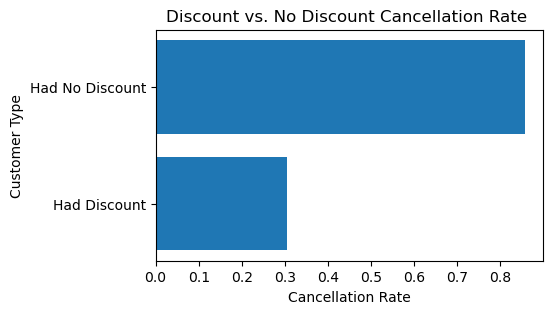

In [39]:
import matplotlib.pyplot as plt

y = ['Had Discount', 'Had No Discount']
x = [0.304, 0.857]

plt.figure(figsize=(5,3))
plt.barh(y, x)
plt.ylabel("Customer Type")
plt.xlabel("Cancellation Rate")
plt.title("Discount vs. No Discount Cancellation Rate ")
plt.show()

Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [40]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [41]:
audio_data.head()

,Name,Genre,Popularity,Audio Type,Audio ID
0,Dance All Night,Pop,1,Song,101
1,Unbreakable Beat,Pop,2,Song,102
2,Sunset Boulevard,Pop,5,Song,103
3,Glowing Hearts,Pop,10,Song,104
4,Pop Rocks,Pop,52,Song,105


In [42]:
new_table = listening_history.merge(audio_data, how='left', on=['Audio ID', 'Audio Type'])
new_table.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Name,Genre,Popularity
0,5001,100520,1,101,Song,Dance All Night,Pop,1.0
1,5001,100520,2,102,Song,Unbreakable Beat,Pop,2.0
2,5001,100520,3,103,Song,Sunset Boulevard,Pop,5.0
3,5001,100520,4,104,Song,Glowing Hearts,Pop,10.0
4,5001,100520,5,105,Song,Pop Rocks,Pop,52.0


In [43]:
new_table.groupby('Customer ID')['Session ID'].nunique()

Customer ID
5001    8
5002    4
5004    1
5267    7
5338    4
5404    1
5581    3
5759    2
5761    3
5763    6
5826    3
5827    1
6029    2
6092    3
6163    3
6229    2
6406    3
6584    2
6586    2
6588    3
6821    2
6822    3
6824    4
7087    3
7158    3
7224    4
7401    3
7579    2
7581    2
7583    1
Name: Session ID, dtype: int64

In [44]:
# The most popular genres that customers listened to
new_table['Genre'].value_counts()

Pop           259
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: Genre, dtype: int64

## 5. Prep for Modeling

Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [45]:
# Create a dataframe ready for modeling
customer_data.head()

model_df = customer_data[['Customer ID', 'Cancelled', 'Discount?']].copy()
model_df.head()

,Customer ID,Cancelled,Discount?
0,5001,0,0
1,5002,0,0
2,5004,1,0
3,5267,0,0
4,5338,0,0


In [46]:
# Calculate the number of listening sessions for each customer
sessions = (new_table.groupby('Customer ID')['Session ID']
                                          .nunique()
                                          .rename('Number of Sessions')
                                          .to_frame()
                                          .reset_index())
sessions.head()

model_df = model_df.merge(sessions, how='left', on='Customer ID')
model_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions
0,5001,0,0,8
1,5002,0,0,4
2,5004,1,0,1
3,5267,0,0,7
4,5338,0,0,4


In [47]:
pd.get_dummies(new_table['Genre'])

,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
500,0,0,0,1,0,0
501,1,0,0,0,0,0
502,0,0,1,0,0,0
503,0,0,1,0,0,0


In [48]:
pd.concat([new_table['Customer ID'], pd.get_dummies(new_table['Genre'])], axis=1)

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,0,0,1,0
1,5001,0,0,0,0,1,0
2,5001,0,0,0,0,1,0
3,5001,0,0,0,0,1,0
4,5001,0,0,0,0,1,0
...,...,...,...,...,...,...,...
500,7579,0,0,0,1,0,0
501,6588,1,0,0,0,0,0
502,5763,0,0,1,0,0,0
503,5763,0,0,1,0,0,0


In [49]:
genres = (pd.concat([new_table['Customer ID'], pd.get_dummies(new_table['Genre'])], axis=1)
           .groupby('Customer ID')
           .sum()
           .reset_index())
genres.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,26,0,34,0
1,5002,0,22,0,0,0,0
2,5004,0,0,0,0,9,0
3,5267,0,0,22,0,23,0
4,5338,0,18,0,0,0,0


In [58]:
total_audio = listening_history.groupby('Customer ID')['Audio ID'].count().rename('Total Audio').to_frame().reset_index()
total_audio.head()

,Customer ID,Total Audio
0,5001,60
1,5002,22
2,5004,9
3,5267,45
4,5338,18


In [71]:
model_df['Percent Pop'] = round((genres['Pop'] / total_audio['Total Audio']) * 100, 0)
model_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Percent Pop
0,5001,0,0,8,0,0,26,0,34,0,57.0
1,5002,0,0,4,0,22,0,0,0,0,0.0
2,5004,1,0,1,0,0,0,0,9,0,100.0
3,5267,0,0,7,0,0,22,0,23,0,51.0
4,5338,0,0,4,0,18,0,0,0,0,0.0


In [85]:
model_df['Percent Podcast'] = round((genres['Comedy'] + genres['True Crime']) / total_audio['Total Audio'] * 100, 0)
model_df.drop(columns=['Comedy', 'Country', 'Hip Hop', 'Jazz', 'Pop', 'True Crime'], inplace=True)
model_df.tail()

,Customer ID,Cancelled,Discount?,Number of Sessions,Percent Pop,Percent Podcast
25,7224,1,1,4,100.0,0.0
26,7401,1,1,3,45.0,27.0
27,7579,0,0,2,0.0,0.0
28,7581,1,1,2,93.0,7.0
29,7583,1,1,1,0.0,100.0


Visualize the relationships in the modeling DataFrame using a pair plot:
* What are some of your observations?
* What variables might do a good job predicting customer cancellation?

In [78]:
import seaborn as sns

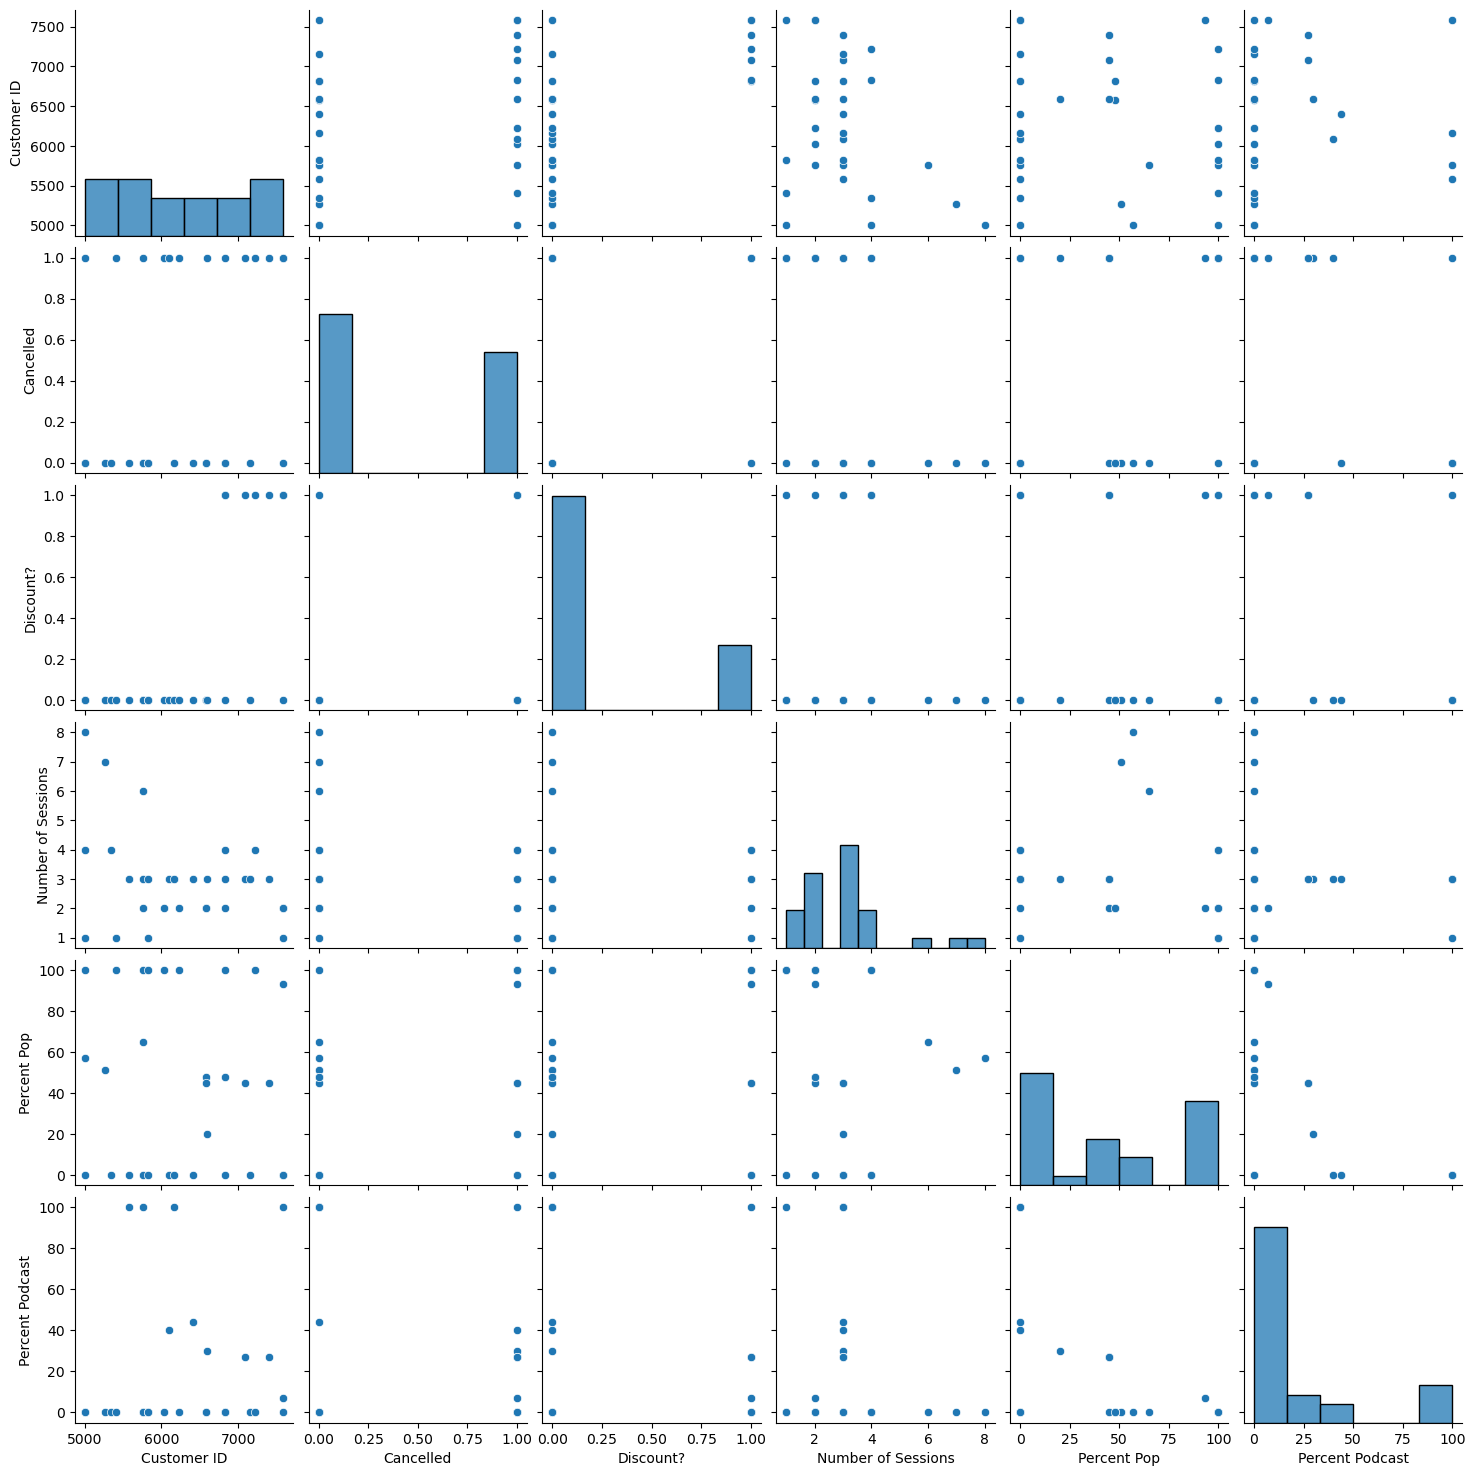

In [86]:
sns.pairplot(model_df)
plt.show()

In [87]:
model_df.corr()

,Customer ID,Cancelled,Discount?,Number of Sessions,Percent Pop,Percent Podcast
Customer ID,1.000000,0.269942,0.648514,-0.337083,-0.079113,0.082174
Cancelled,0.269942,1.000000,0.471825,-0.333739,0.536948,-0.035817
Discount?,0.648514,0.471825,1.000000,-0.048877,0.143311,0.061983
Number of Sessions,-0.337083,-0.333739,-0.048877,1.000000,-0.124145,-0.125422
Percent Pop,-0.079113,0.536948,0.143311,-0.124145,1.000000,-0.506018
Percent Podcast,0.082174,-0.035817,0.061983,-0.125422,-0.506018,1.000000
